### Data Science and Business Analysis Intern

### Author - Toushik Maiti

### Task_1: Prediction using Supervised ML

**● Predict the percentage of an student based on the no. of study hours. ● This is a simple linear regression task as it involves just 2 variables. ● You can use R, Python, SAS Enterprise Miner or any other tool ● Data can be found at http://bit.ly/w-data ● What will be predicted score if a student studies for 9.25 hrs/ day?**

In [3]:
# importing all the libraries 

import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn import model_selection
from sklearn import linear_model

In [7]:
# Reading the data from web link

Data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
Data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
Data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
Data.shape

(25, 2)

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
Data.columns

Index(['Hours', 'Scores'], dtype='object')

In [16]:
Data.groupby(["Hours"])["Scores"].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

### Exploring the Dataset

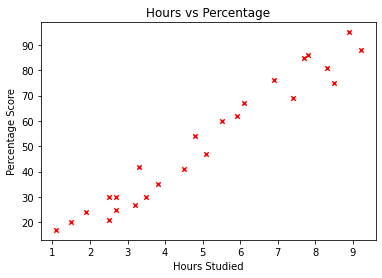

In [38]:
# Ploting the distribution of scores

Data.plot(kind = "scatter", x= "Hours", y = "Scores", marker = "x", style = "o", color = "r")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [42]:
Data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Plotting the regression line')

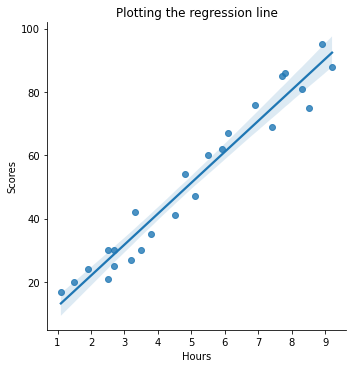

In [45]:
sns.lmplot(x="Hours",y="Scores", data=Data)
plt.title("Plotting the regression line")
#sns.regplot(x="Hours", y="Scores", data=Data)

***From the above graph, we can say that there is a positive linear relationship between hours studied and percentage of scores. If one can study more hourss, then scores more.***

### Preparing the Data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [50]:
x = Data.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [57]:
y= Data.iloc[:, 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting the dataset into the Training set and Test set

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [59]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0) 

### **Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [60]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


### Predicting the Test set results


In [61]:
y_pred = regressor.predict(x_test)

In [62]:
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [63]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### Visualising the Training set results


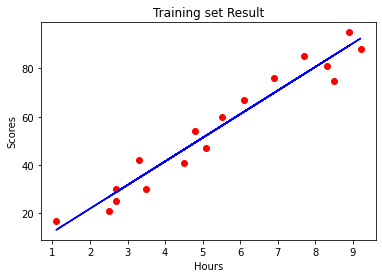

In [75]:
# Plotting the training set
plt.scatter(X_train,y_train, color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Training set Result')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Visualising the Test set results

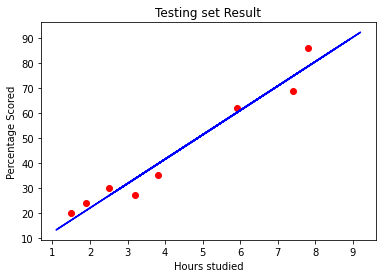

In [77]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Testing set Result')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()

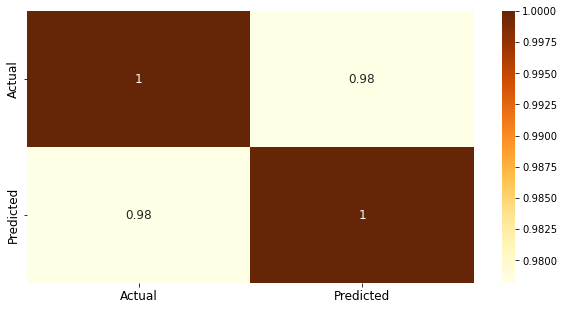

In [78]:
# Checking the correlations
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr",annot_kws={'fontsize':12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Visualizing the differences between actual Scores and predicted Scores


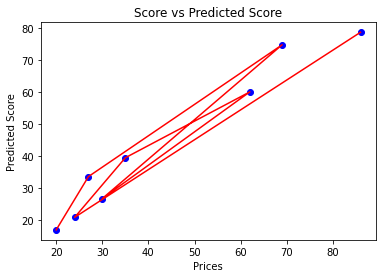

In [80]:
plt.scatter(y_test,y_pred,c='b')
plt.plot(y_test,y_pred,c='r')
plt.xlabel("Prices")
plt.ylabel("Predicted Score")
plt.title("Score vs Predicted Score")
plt.show()

### What will be predicted score if a student studies for 9.25 hrs/ day?


In [81]:
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


### Checking accuracy of our model


In [82]:
print("Train : ",regressor.score(X_train,y_train)*100)
print("Test : ",regressor.score(X_test,y_test)*100)

Train :  94.84997422695115
Test :  95.68211104435257


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.


In [85]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652


###  Mean absolute error: 4.419727808027652 which is quite accurate model for predicting the result.
